In [6]:
%pylab inline
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors
from scipy import io
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import h5py
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import plotting
plt.style.use('ggplot')
import warnings
from tqdm import tqdm_notebook
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd /home/chenxupeng/projects/computneuron/HW1

/home/chenxupeng/projects/computneuron/HW1


In [5]:
data0 = io.loadmat('HW1_data/twobrains.mat')

In [56]:
np.unique(data0['brain1'].astype('int'))

array([   0,    2,    4,    5,    7,    8,   10,   11,   12,   13,   14,
         15,   16,   17,   18,   24,   26,   28,   30,   31,   41,   43,
         44,   46,   47,   49,   50,   51,   52,   53,   54,   58,   60,
         62,   63,   72,   77,   85,  251,  252,  253,  254,  255, 1000,
       1001, 1002, 1003, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 3001, 3002, 3003, 3005, 3006, 3007, 3008, 3009,
       3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020,
       3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031,
       3032, 3033, 3034, 3035, 4001, 4002, 4003, 40

In [7]:
area = {}  #fr pa te oc  left right
area[0]=np.array([1002,1003,1012,1014,1017,1018,1019,1020,1024,1026,1027,1028,1032])
area[1]=np.array([2002,2003,2012,2014,2017,2018,2019,2020,2024,2026,2027,2028,2032])
area[2]=np.array([1008, 1010,1023,1029,1031,1022,1025])
area[3]=np.array([2008,2010,2023,2029,2031,2022,2025])
area[4]=np.array([1006,1007,1009 ,1015 ,1016,1030,1033, 1034 ])
area[5]=np.array([2006,2007,2009 ,2015 ,2016,2030,  2033  ,2034   ])
area[6]=np.array([1011,1013,1005,1021,1025 ])
area[7]=np.array([2011,2013,2005,2021,2025 ])

In [8]:
def reset(array):
    numlist =[-1,-2,-3,-4,-5,-6,-7,-8]
    for i in range(8):
        for a in area[i]:
            array[array ==a] = numlist[i]
    array[array >=0] =0
    return -array

In [9]:
brain1 = reset(data0['brain1'].astype('int32'))
brain2 = reset(data0['brain2'].astype('int32'))

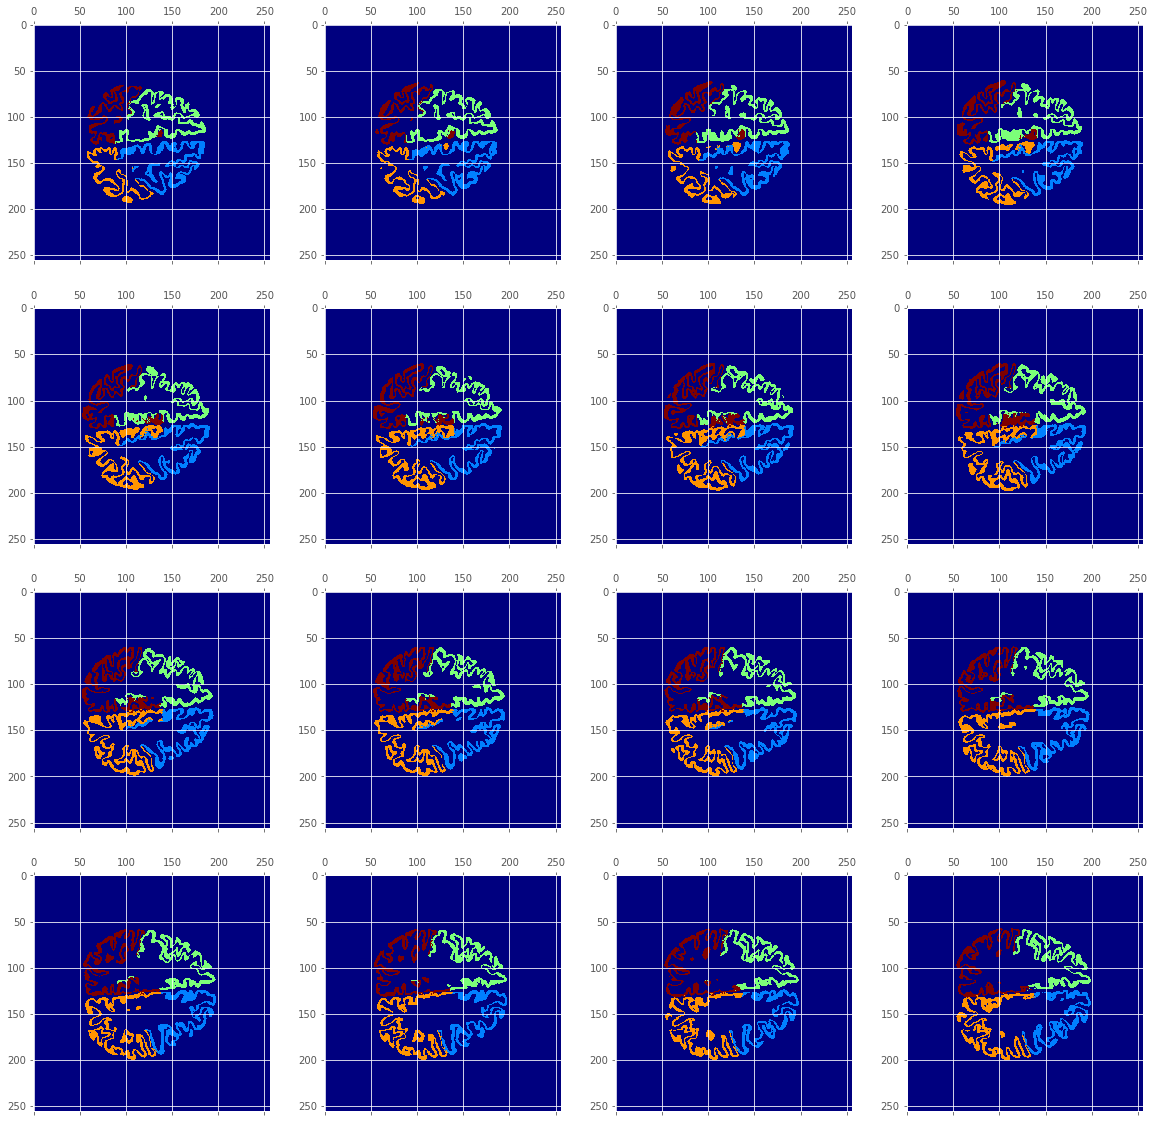

In [10]:
fig, ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].matshow(brain1[100+4*i+j,:,:],cmap='jet')

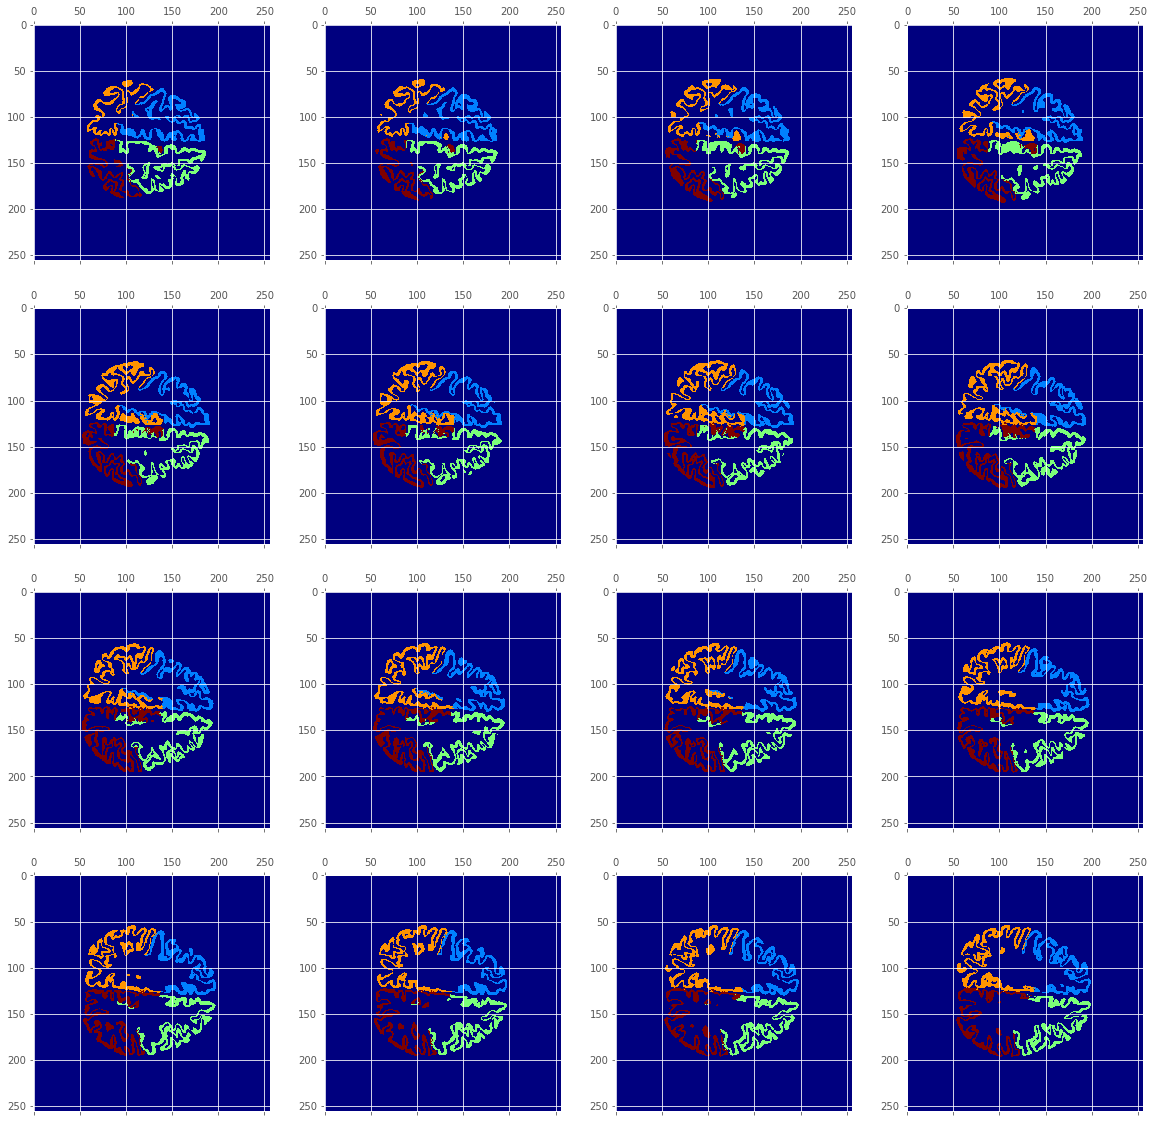

In [11]:
fig, ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].matshow(brain1[100+4*i+j,::-1,:],cmap='jet')

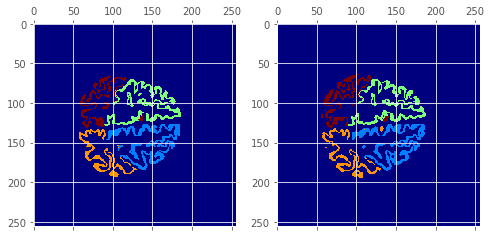

In [12]:
fig, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].matshow(brain1[100,:,:],cmap='jet')
ax[1].matshow(brain1[101,:,:],cmap='jet')

In [13]:
np.where(brain1.ravel()

SyntaxError: unexpected EOF while parsing (<ipython-input-13-3a0f154a6590>, line 1)

In [ ]:
(brain1 !=0).sum()

In [ ]:
def count_percentile(array):
    whole = (array !=0).sum()
    listcount = []
    for i in range(8):
        listcount.append((array ==(i+1)).sum())
    perclist =[]
    for j in range(4):
        perclist.append((listcount[j*2]+listcount[j*2+1])/float(whole))
    print whole
    print listcount
    return perclist

In [ ]:
count_percentile(brain1)

In [ ]:
count_percentile(brain2)

## 1（2）
使用减法,然后算差的比例？ 这个问题是只是数值上的统计，没有考虑空间上的对应！
用镜像加icp算r2？  可以考虑空间上尽可能的对齐了

In [ ]:
def diff_perc(array):
    '''
    right subtract left and then diveded by left
    '''
    diflist =[]
    for i in range(4):
        diflist.append(((array ==(2*i+2)).sum() - (array ==(2*i+1)).sum())/float((array ==(2*i+1)).sum()))
    listcount = []
    for i in range(8):
        listcount.append((array ==(i+1)).sum())
    rightsum = 0
    leftsum = 0
    for i in range(4):
        rightsum += listcount[2*i+1]
        leftsum += listcount[2*i]
    print 'right region: %s' %str(rightsum)
    print 'left region: %s' %str(leftsum)
    print 'left/right region ratio: %s' %str(leftsum/float(rightsum))
    return diflist

In [15]:
diff_perc(brain1)

right region: 244742
left region: 249244
left/right region ratio: 1.01839488114


[-0.022138453848717096,
 -0.013333522260322498,
 -0.037588964062911873,
 0.027357867329887695]

In [14]:
diff_perc(brain2)

right region: 210662
left region: 206534
left/right region ratio: 0.980404629216


[-0.0068126754143977737,
 0.038038106274924162,
 0.01722217462085511,
 0.093268906618721198]

###  使用ICP
m-dimensional Iterative Closest Point method. ICP finds a best fit rigid body transformation between two point sets. Correspondence between the points is not assumed. Included is an SVD-based least-squared best-fit algorithm for corresponding point sets.

In [16]:
def best_fit_transform(A, B):
    '''
    Calculates the least-squares best-fit transform that maps corresponding points A to B in m spatial dimensions
    Input:
      A: Nxm numpy array of corresponding points
      B: Nxm numpy array of corresponding points
    Returns:
      T: (m+1)x(m+1) homogeneous transformation matrix that maps A on to B
      R: mxm rotation matrix
      t: mx1 translation vector
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # translate points to their centroids
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    AA = A - centroid_A
    BB = B - centroid_B

    # rotation matrix
    H = np.dot(AA.T, BB)
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # special reflection case
    if np.linalg.det(R) < 0:
       Vt[m-1,:] *= -1
       R = np.dot(Vt.T, U.T)

    # translation
    t = centroid_B.T - np.dot(R,centroid_A.T)

    # homogeneous transformation
    T = np.identity(m+1)
    T[:m, :m] = R
    T[:m, m] = t

    return T, R, t


def nearest_neighbor(src, dst):
    '''
    Find the nearest (Euclidean) neighbor in dst for each point in src
    Input:
        src: Nxm array of points
        dst: Nxm array of points
    Output:
        distances: Euclidean distances of the nearest neighbor
        indices: dst indices of the nearest neighbor
    '''

    assert src.shape == dst.shape

    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(dst)
    distances, indices = neigh.kneighbors(src, return_distance=True)
    return distances.ravel(), indices.ravel()


def icp(A, B, init_pose=None, max_iterations=20, tolerance=0.001):
    '''
    The Iterative Closest Point method: finds best-fit transform that maps points A on to points B
    Input:
        A: Nxm numpy array of source mD points
        B: Nxm numpy array of destination mD point
        init_pose: (m+1)x(m+1) homogeneous transformation
        max_iterations: exit algorithm after max_iterations
        tolerance: convergence criteria
    Output:
        T: final homogeneous transformation that maps A on to B
        distances: Euclidean distances (errors) of the nearest neighbor
        i: number of iterations to converge
    '''

    assert A.shape == B.shape

    # get number of dimensions
    m = A.shape[1]

    # make points homogeneous, copy them to maintain the originals
    src = np.ones((m+1,A.shape[0]))
    dst = np.ones((m+1,B.shape[0]))
    src[:m,:] = np.copy(A.T)
    dst[:m,:] = np.copy(B.T)

    # apply the initial pose estimation
    if init_pose is not None:
        src = np.dot(init_pose, src)

    prev_error = 0

    for i in range(max_iterations):
        # find the nearest neighbors between the current source and destination points
        distances, indices = nearest_neighbor(src[:m,:].T, dst[:m,:].T)

        # compute the transformation between the current source and nearest destination points
        T,_,_ = best_fit_transform(src[:m,:].T, dst[:m,indices].T)

        # update the current source
        src = np.dot(T, src)

        # check error
        mean_error = np.mean(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error

    # calculate final transformation
    T,_,_ = best_fit_transform(A, src[:m,:].T)

    return T, distances, i

In [17]:
# Constants
N = 10                                    # number of random points in the dataset
num_tests = 100                             # number of test iterations
dim = 3                                     # number of dimensions of the points
noise_sigma = .01                           # standard deviation error to be added
translation = .1                            # max translation of the test set
rotation = .1                               # max rotation (radians) of the test set


def rotation_matrix(axis, theta):
    axis = axis/np.sqrt(np.dot(axis, axis))
    a = np.cos(theta/2.)
    b, c, d = -axis*np.sin(theta/2.)

    return np.array([[a*a+b*b-c*c-d*d, 2*(b*c-a*d), 2*(b*d+a*c)],
                  [2*(b*c+a*d), a*a+c*c-b*b-d*d, 2*(c*d-a*b)],
                  [2*(b*d-a*c), 2*(c*d+a*b), a*a+d*d-b*b-c*c]])


def test_best_fit():

    # Generate a random dataset
    A = np.random.rand(N, dim)

    total_time = 0

    for i in range(num_tests):

        B = np.copy(A)

        # Translate
        t = np.random.rand(dim)*translation
        B += t

        # Rotate
        R = rotation_matrix(np.random.rand(dim), np.random.rand()*rotation)
        B = np.dot(R, B.T).T

        # Add noise
        B += np.random.randn(N, dim) * noise_sigma

        # Find best fit transform
        start = time.time()
        T, R1, t1 = best_fit_transform(B, A)
        total_time += time.time() - start

        # Make C a homogeneous representation of B
        C = np.ones((N, 4))
        C[:,0:3] = B

        # Transform C
        C = np.dot(T, C.T).T

        assert np.allclose(C[:,0:3], A, atol=6*noise_sigma) # T should transform B (or C) to A
        assert np.allclose(-t1, t, atol=6*noise_sigma)      # t and t1 should be inverses
        assert np.allclose(R1.T, R, atol=6*noise_sigma)     # R and R1 should be inverses

    print('best fit time: {:.3}'.format(total_time/num_tests))

    return


def test_icp():

    # Generate a random dataset
    A = np.random.rand(N, dim)

    total_time = 0

    for i in range(num_tests):

        B = np.copy(A)

        # Translate
        t = np.random.rand(dim)*translation
        B += t

        # Rotate
        R = rotation_matrix(np.random.rand(dim), np.random.rand() * rotation)
        B = np.dot(R, B.T).T

        # Add noise
        B += np.random.randn(N, dim) * noise_sigma

        # Shuffle to disrupt correspondence
        np.random.shuffle(B)

        # Run ICP
        start = time.time()
        T, distances, iterations = icp(B, A, tolerance=0.000001)
        total_time += time.time() - start

        # Make C a homogeneous representation of B
        C = np.ones((N, 4))
        C[:,0:3] = np.copy(B)

        # Transform C
        C = np.dot(T, C.T).T

        assert np.mean(distances) < 6*noise_sigma                   # mean error should be small
        assert np.allclose(T[0:3,0:3].T, R, atol=6*noise_sigma)     # T and R should be inverses
        assert np.allclose(-T[0:3,3], t, atol=6*noise_sigma)        # T and t should be inverses

    print('icp time: {:.3}'.format(total_time/num_tests))

    return A,B,C,T,distances
#test_best_fit()

In [105]:
leftregion = np.concatenate(np.nonzero(brain1%2 ==1), axis=0).reshape((3, -1))
brain1_reflect = brain1[:,::-1,:]
reflectrightregion = np.concatenate(np.nonzero((brain1_reflect%2 ==0)&(brain1_reflect>0)), axis=0).reshape((3, -1))
randind = np.random.choice(249244,size =249244-4502,replace=True)
A,B,C = icp(reflectrightregion.T, leftregion.T[randind], tolerance=0.000001)
reflectrightregion_ = np.ones((reflectrightregion.T.shape[0],4))
reflectrightregion_[:,:3] = reflectrightregion.T


In [156]:
np.round(reflectrightregion_.dot(A.T))

array([[  71.,  143.,   88.,    1.],
       [  71.,  143.,   89.,    1.],
       [  71.,  144.,   88.,    1.],
       ..., 
       [ 195.,  179.,  146.,    1.],
       [ 195.,  179.,  147.,    1.],
       [ 195.,  179.,  148.,    1.]])

计算完右边的点的变换与左边的点并没有对应，要用nearest neighbour

In [173]:
D,E = nearest_neighbor(leftregion.T[randind],np.round(reflectrightregion_.dot(A.T))[:,:3])

In [174]:
(np.round(reflectrightregion_.dot(A.T))[:,:3])[E]

array([[ 158.,  137.,  188.],
       [ 153.,  196.,  140.],
       [ 160.,  137.,  185.],
       ..., 
       [ 150.,  135.,  201.],
       [ 132.,  183.,  152.],
       [ 158.,  201.,  123.]])

In [18]:
from sklearn.metrics import r2_score

In [175]:
r2_score(leftregion.T[randind],(np.round(reflectrightregion_.dot(A.T))[:,:3])[E])

0.99893398663355182